<a href="https://colab.research.google.com/github/Sriyoshija/task2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: '/content/personality_datasert.csv' not found.
Using a dummy DataFrame for demonstration.
--- DATA OVERVIEW ---
Shape: (1000, 6)

First 5 rows:
    NumericCol1  NumericCol2  NumericCol3 CategoryCol1 CategoryCol2 MixedCol
0     0.662074     1.146106           30            D            X     None
1     0.685613    -0.437784           63            A            X     None
2     0.154812     1.294517           61            C            Y        A
3     0.169028    -1.858787           93            D            X        A
4     0.824437     1.211231           57            C            Z        1

Data types:
 NumericCol1     float64
NumericCol2     float64
NumericCol3       int64
CategoryCol1     object
CategoryCol2     object
MixedCol         object
dtype: object

Missing values:
 NumericCol1       0
NumericCol2       0
NumericCol3       0
CategoryCol1      0
CategoryCol2      0
MixedCol        214
dtype: int64

--- SUMMARY STATISTICS ---


,NumericCol1,NumericCol2,NumericCol3,CategoryCol1,CategoryCol2,MixedCol
count,1000.000000,1000.000000,1000.000000,1000,1000,786.0
unique,NaN,NaN,NaN,4,3,2.0
top,NaN,NaN,NaN,C,X,1.0
freq,NaN,NaN,NaN,284,349,405.0
mean,0.514573,0.020954,49.824000,NaN,NaN,NaN
std,0.292109,0.990571,28.419759,NaN,NaN,NaN
min,0.000181,-2.651939,0.000000,NaN,NaN,NaN
25%,0.263117,-0.677589,25.000000,NaN,NaN,NaN
50%,0.523283,-0.027753,50.000000,NaN,NaN,NaN
75%,0.772044,0.724368,74.000000,NaN,NaN,NaN



--- VISUALIZATIONS FOR NUMERIC COLUMNS ---


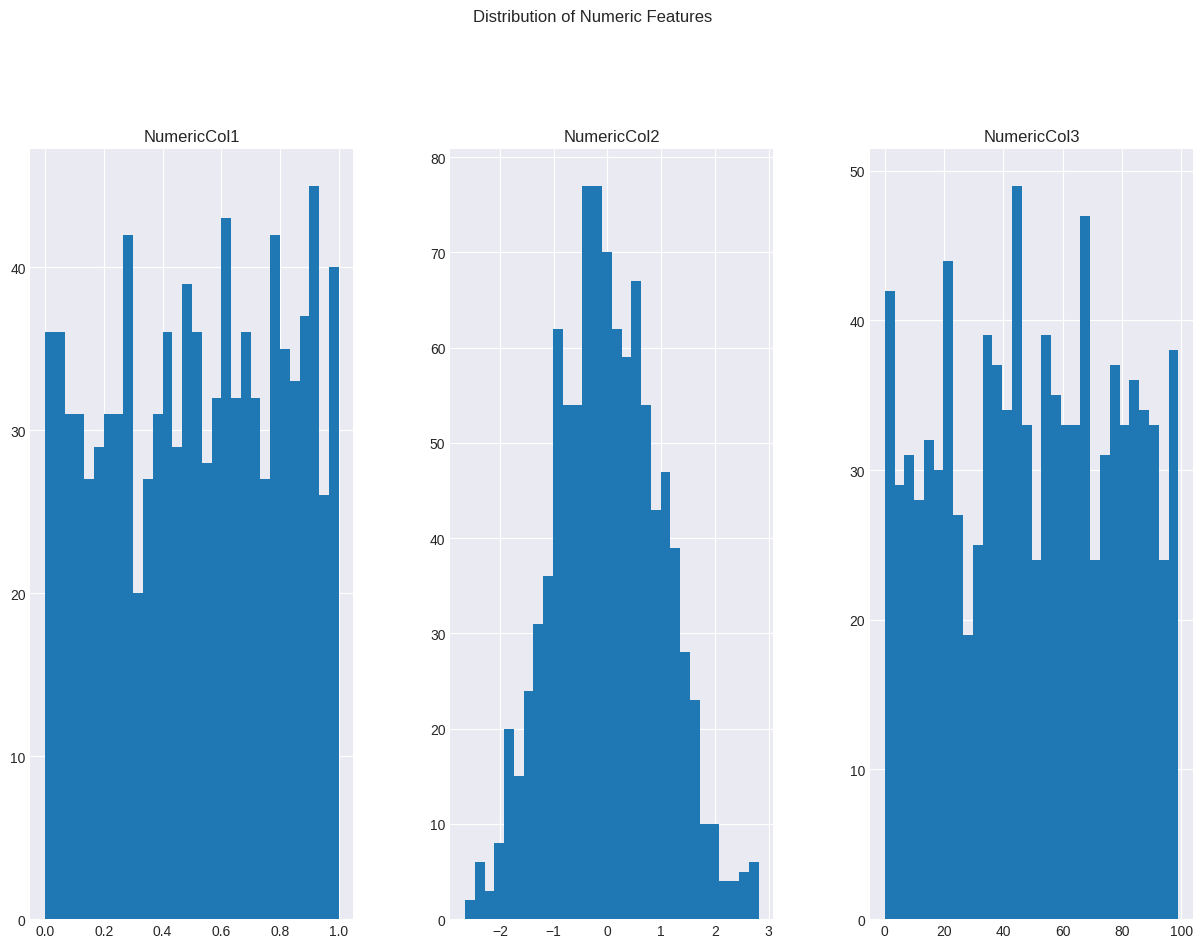

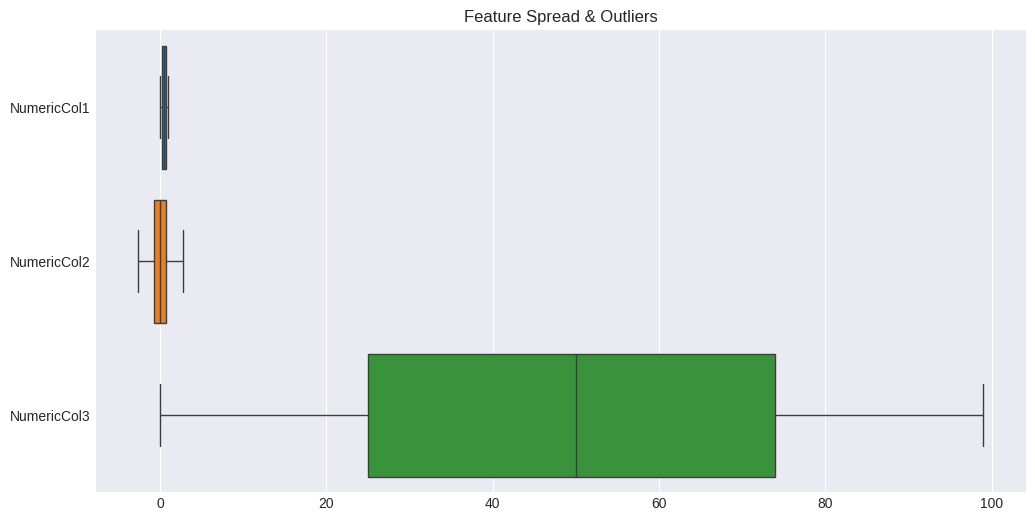

/tmp/ipython-input-1-3927084119.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not corr_matrix.applymap(np.isreal).all().all():


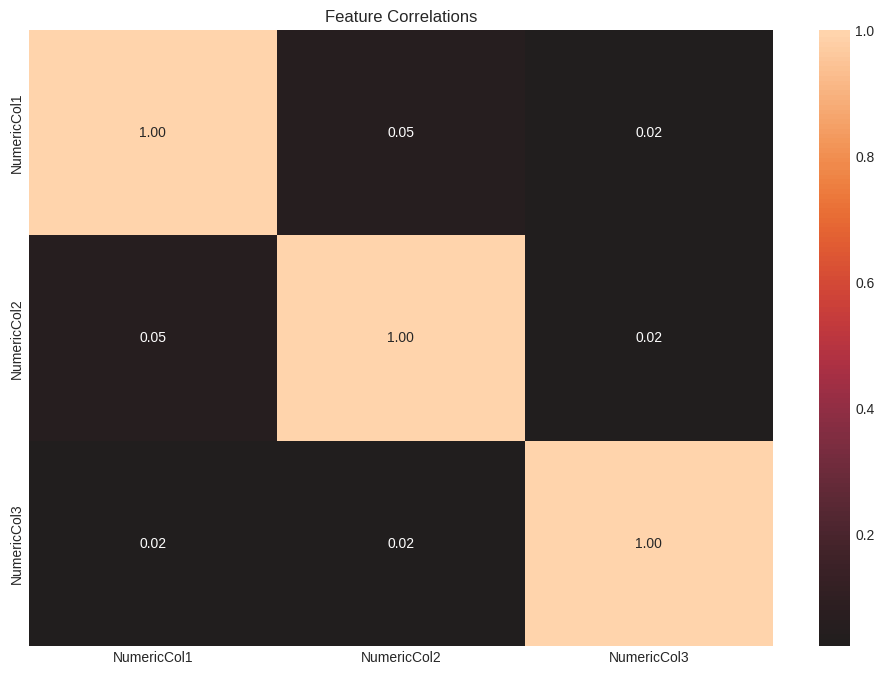

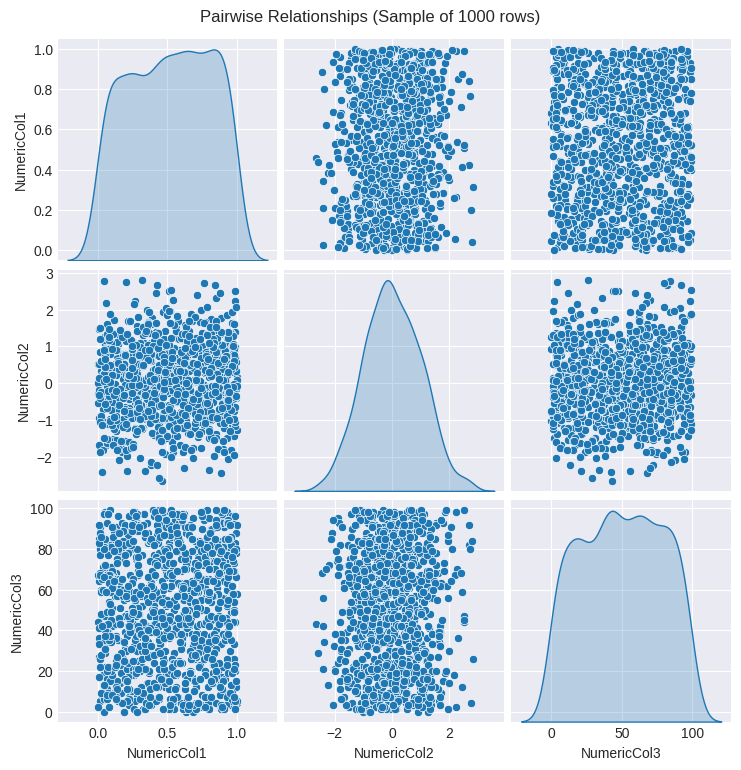


 VISUALIZATIONS FOR CATEGORICAL COLUMNS 


/tmp/ipython-input-1-3927084119.py:137: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




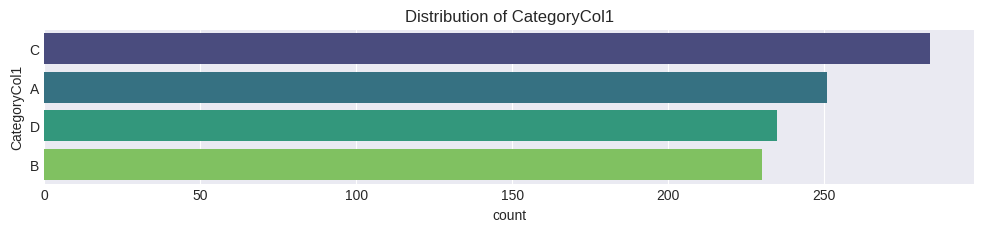

/tmp/ipython-input-1-3927084119.py:137: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




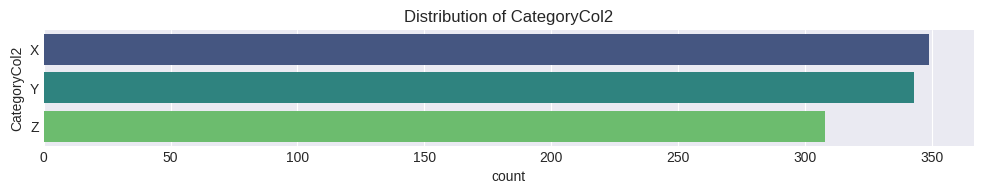

/tmp/ipython-input-1-3927084119.py:137: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




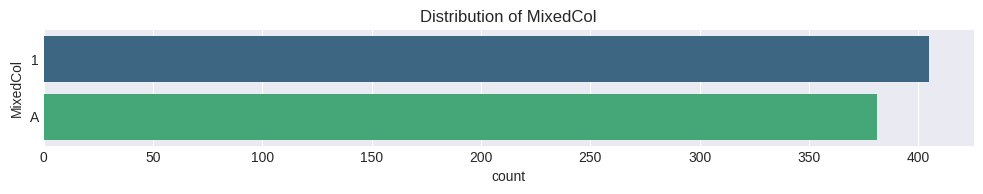


 POTENTIAL INSIGHTS 
Based on the data overview, summary statistics, and visualizations, consider the following:
1. Distribution Analysis: Examine histograms for the shape of distributions (normal, skewed, etc.) and potential modes.
2. Outlier Detection: Review boxplots to identify potential outliers in numeric features.
3. Correlation Check: Analyze the heatmap for strong positive or negative correlations between numeric features (|correlation| > 0.7).
4. Missing Data: Note columns with missing values from the 'Missing values' section and consider appropriate imputation or handling strategies.
5. Categorical Patterns: Observe the count plots for the distribution of categories in each categorical feature. Look for dominant categories or imbalances.
6. Pairwise Relationships: If generated, examine the pairplot for visual relationships between pairs of numeric features.
7. Interactive Scatter Plot: If generated, explore the interactive scatter plot for potential relationships between nu

In [1]:
!pip install pandas matplotlib seaborn plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

try:
    df = pd.read_csv('/content/personality_datasert.csv')
except FileNotFoundError:
    print("Error: '/content/personality_datasert.csv' not found.")

    data = {
        'NumericCol1': np.random.rand(1000),
        'NumericCol2': np.random.randn(1000),
        'NumericCol3': np.random.randint(0, 100, 1000),
        'CategoryCol1': np.random.choice(['A', 'B', 'C', 'D'], 1000),
        'CategoryCol2': np.random.choice(['X', 'Y', 'Z'], 1000),
        'MixedCol': np.random.choice([1, 'A', None], 1000, p=[0.4, 0.4, 0.2])
    }
    df = pd.DataFrame(data)
    print("Using a dummy DataFrame for demonstration.")


print("--- DATA OVERVIEW ---")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

print("\n--- SUMMARY STATISTICS ---")
display(df.describe(include='all'))

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['START_DATE', 'END_DATE']]

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if numeric_cols:
    print("\n--- VISUALIZATIONS FOR NUMERIC COLUMNS ---")

    # Histograms and Density Plots
    df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=((len(numeric_cols) + 2) // 3, 3))
    plt.suptitle('Distribution of Numeric Features', y=1.02)
    plt.show()

    # Boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numeric_cols], orient='h')
    plt.title("Feature Spread & Outliers")
    plt.show()

    # Correlation Matrix
    numeric_df_for_corr = df[numeric_cols].select_dtypes(include=['number'])

    if len(numeric_df_for_corr.columns) > 1:
        try:
            corr_matrix = numeric_df_for_corr.corr()

            if not corr_matrix.applymap(np.isreal).all().all():
                print("\nWarning: Correlation matrix contains non-numeric values. Attempting to clean.")
                corr_matrix = corr_matrix.astype(float, errors='coerce')
                corr_matrix.dropna(axis=0, how='all', inplace=True)
                corr_matrix.dropna(axis=1, how='all', inplace=True)
                if corr_matrix.empty or len(corr_matrix.columns) < 2:
                     print("\nAfter cleaning, less than two numeric columns remain for correlation matrix.")
                     corr_matrix = None


            if corr_matrix is not None and not corr_matrix.empty and len(corr_matrix.columns) > 1:
                 plt.figure(figsize=(12, 8))
                 sns.heatmap(corr_matrix, annot=True, cmap='icefire', fmt=".2f", center=0)
                 plt.title("Feature Correlations")
                 plt.show()
            elif corr_matrix is None:
                 pass
            else:
                 print("\nCorrelation matrix is empty or has less than two columns after cleaning.")


        except Exception as e:
            print(f"\nError generating correlation matrix or heatmap: {e}")
    else:
        print("\nLess than two numeric columns available for correlation matrix.")

    if len(numeric_cols) > 1:
        sample_size = min(1000, len(df))
        if sample_size > 0:
            sample_df = df[numeric_cols].sample(sample_size, random_state=42).select_dtypes(include=['number'])
            if not sample_df.empty and len(sample_df.columns) > 1:
                sns.pairplot(sample_df, diag_kind='kde')
                plt.suptitle(f"Pairwise Relationships (Sample of {sample_size} rows)", y=1.02)
                plt.show()
            else:
                 print("\nNot enough numeric columns in sample for pairplot.")
        else:
             print("\nDataFrame is empty, skipping pairplot.")
    else:
        print("\nNot enough numeric columns for pairplot.")

    if len(numeric_cols) >= 2:
        try:
            scatter_cols = [col for col in numeric_cols if col in df.select_dtypes(include=['number']).columns]
            if len(scatter_cols) >= 2:
                if len(scatter_cols) >= 3:
                     fig = px.scatter_3d(df,
                                x=scatter_cols[0],
                                y=scatter_cols[1],
                                z=scatter_cols[2],
                                title="Interactive 3D Relationship")
                else:
                     fig = px.scatter(df,
                                x=scatter_cols[0],
                                y=scatter_cols[1],
                                title="Interactive 2D Relationship")
                fig.show()
            else:
                 print("\nNot enough numeric columns for interactive scatter plot after cleaning.")
        except Exception as e:
            print(f"\nError generating interactive scatter plot: {e}")
    else:
        print("\nNot enough numeric columns for interactive scatter plot.")


else:
    print("\nNo numeric columns to visualize.")


if categorical_cols:
    print("\n VISUALIZATIONS FOR CATEGORICAL COLUMNS ")
    for col in categorical_cols:
        plt.figure(figsize=(12, min(8, len(df[col].unique()) * 0.5)))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.show()
else:
    print("\nNo categorical columns to visualize.")

print("\n POTENTIAL INSIGHTS ")
print("Based on the data overview, summary statistics, and visualizations, consider the following:")
print("1. Distribution Analysis: Examine histograms for the shape of distributions (normal, skewed, etc.) and potential modes.")
print("2. Outlier Detection: Review boxplots to identify potential outliers in numeric features.")
print("3. Correlation Check: Analyze the heatmap for strong positive or negative correlations between numeric features (|correlation| > 0.7).")
print("4. Missing Data: Note columns with missing values from the 'Missing values' section and consider appropriate imputation or handling strategies.")
print("5. Categorical Patterns: Observe the count plots for the distribution of categories in each categorical feature. Look for dominant categories or imbalances.")
print("6. Pairwise Relationships: If generated, examine the pairplot for visual relationships between pairs of numeric features.")
print("7. Interactive Scatter Plot: If generated, explore the interactive scatter plot for potential relationships between numeric features.")